In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-familiarraredisease/family_history_rare_disease_cleaned.csv
/kaggle/input/dataset-familiarraredisease/UPDATED_README.md


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data_path = "/kaggle/input/dataset-familiarraredisease/family_history_rare_disease_cleaned.csv"
data = pd.read_csv(data_path)


In [3]:
# Handle infinite values by replacing them with NaN
data.replace([float('inf'), float('-inf')], pd.NA, inplace=True)

# Suppress warnings related to deprecated functionality
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Remove the label and preprocess data
label = 'geneticTest'
X = data.drop(columns=[label, 'Patient ID'])
y = data[label]



In [4]:
# Encode categorical features
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Encode the target variable
y = LabelEncoder().fit_transform(y)

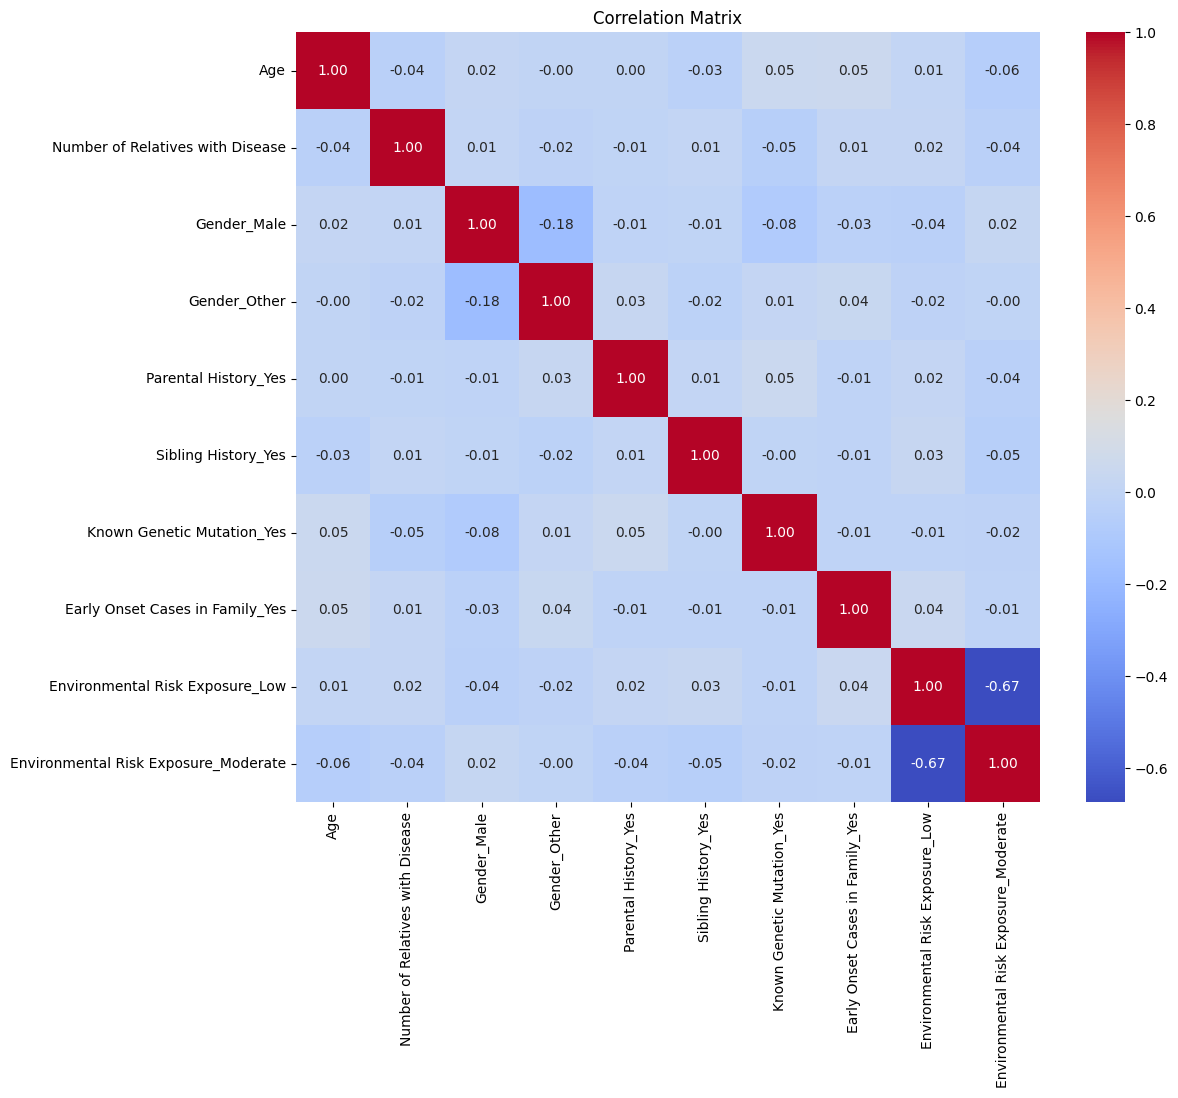

In [5]:

# Plot correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a RandomForest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# Make predictions
y_pred = rf_model.predict(X_test)


# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))


print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.92      0.85       238
           1       0.05      0.02      0.02        62

    accuracy                           0.73       300
   macro avg       0.42      0.47      0.43       300
weighted avg       0.63      0.73      0.68       300


Accuracy Score:
0.7333333333333333


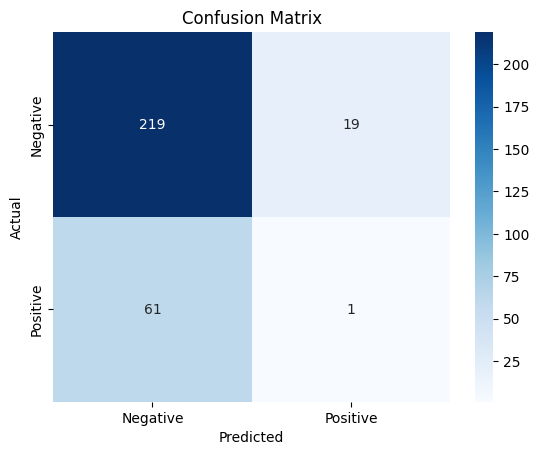

In [8]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

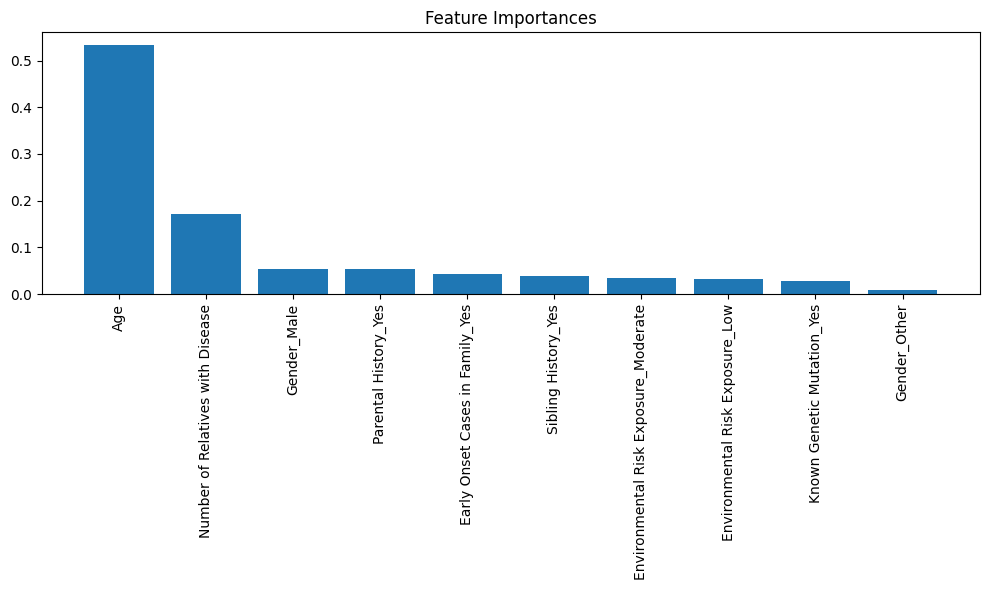

In [9]:

# Feature importance plot
importances = rf_model.feature_importances_
indices = importances.argsort()[::-1]
features = list(X.columns)

# Ensure indices are valid and within range
valid_indices = [i for i in indices if i < len(features)]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(len(valid_indices)), [importances[i] for i in valid_indices], align='center')
plt.xticks(range(len(valid_indices)), [features[i] for i in valid_indices], rotation=90)
plt.tight_layout()
plt.show()

In [10]:
# Summary
print("\nModeling Summary:")
print("1. A RandomForestClassifier was trained to predict genetic test results.")
print("2. The classification report and accuracy score provide insights into model performance.")
print("3. The confusion matrix shows the model's ability to distinguish between positive and negative results.")
print("4. Feature importance highlights key factors influencing predictions.")


Modeling Summary:
1. A RandomForestClassifier was trained to predict genetic test results.
2. The classification report and accuracy score provide insights into model performance.
3. The confusion matrix shows the model's ability to distinguish between positive and negative results.
4. Feature importance highlights key factors influencing predictions.
